# **Convolutional Neural Networks: A Tutorial Introduction**

### [Matteo De Matola](https://github.com/matteo-d-m) 

 (material previously taught in Lecture 3.3 of [Python for (open) Neuroscience](https://github.com/vigji/python-cimec-2024), 2024 iteration)

Convolutional neural networks (CNNs) are a class of artificial neural networks that are widely used across several domains.

In the last ten years, they have been increasingly used as:
- Models of the ventral visual stream 
- EEG classifiers
- MRI classifiers 
- EEG forecasters
- & more

At CoN&Co, we are using CNNs as EEG classifiers (and we might use them as EEG forecasters).

Due to their increasing popularity in neuroscientific research, it is increasingly important to understand what CNNs are and how to implement them.

This notebook cannot provide a throrough treatment of their theory and applications. But it will:
- Provide all the basic definitions
- Introduce all the basic Python tools
- Build a working CNN for object recognition, step-by-step
- Provide pointers to external resources (e.g., papers, books, and online courses) to deepen your understanding of CNN theory

## Core concept 1: Artificial Neural Networks 

As mentioned above, CNNs are a class of artificial neural networks (ANNs). 

ANNs are mathematical models of networks of interacting biological neurons. While their biological plausibility is debatable, ANNs have proven able to simulate some aspects of animal cognition, such as learning, vision, language, and executive control. 

The cornerstone of artificial neural networks is the artificial neuron. 

This is a mathematical model (basically, one equation) that represents a neuron as a weighted sum of its inputs:

Given: 
- $ \bold{x} = [x_{1},x_{2},x_{3},...,x_{n}]  $
- $ \bold{w} = [w_{1},w_{2},w_{3},...,w_{n}]  $

Calculate: 

$ \displaystyle a = \sum_{i = 1}^{n} w_{i}x_{i} = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + ... + w_{n}x_{n} $

where

- $ \bold{x} = n $ input intensity values
- $ \bold{w} = n $ corresponding weights
- $ a = $ the neuron's activation

This makes biological sense if you think that:
- Real neurons receive inputs from multiple synapses
- Different synapses have different strengths, therefore, the inputs they provide have different _weights_ (i.e., importance, salience, relevance...)
- Postsynaptic potentials and action potentials are the sum of the potentials generated by synaptic activity

To model a single neuron, we have multiplied two vectors ($\bold{x}$ and $\bold{w}$). 

To model a larger set of neurons (i.e., a network), we multiply the vector of inputs ($\bold{x}$) for a full matrix of coeffients ($\bold{W}$). This really doesn't change anything but the number of neurons involved.

Given:

- $ \bold{x} = [x_{1},x_{2},x_{3},...,x_{n}]  $

- $ \bold{W} = \displaystyle \begin{bmatrix}
                              w_{11} & w_{12} & w_{13} & ... &  w_{1n} \\
                              w_{21} & w_{22} & w_{23} & ... &  w_{2n} \\
                              w_{31} & w_{32} & w_{33} & ... &  w_{3n} \\
                              \vdots & \vdots & \vdots & \ddots & \vdots \\
                              w_{n1} & w_{n2} & w_{n3} & ... & w_{nn} 
                              \end{bmatrix}    $  

Calculate: 

$ \displaystyle a_{i} = \sum_{j = 1}^{n} w_{ij}x_{i} = w_{i1}x_{1} + w_{i2}x_{2} + w_{i3}x_{3} + ... + w_{in}x_{n} $

where

- $ \bold{x} = n $ input intensity values
- $ \bold{w} = n $ corresponding weights
- $ a = $ the neuron's activation

The computation of the neuron's activation value is often followed by a non-linear function that we call the _activation function_ ( $f$ ):

$ o = f(a) $

where

- $o$ = the neuron's output
- $a$ = the neuron's activation (weighted sum of its inputs)
- $f$ = some nonlinear function

There are myriads of possible activation functions. One classic example is the sigmoid function:

$$ \sigma = \frac{1}{(1+e^{-x})} $$

It might look complex, but it does little more than compressing the input between 0 and 1:

Text(0.5, 1.0, 'Sigmoid function')

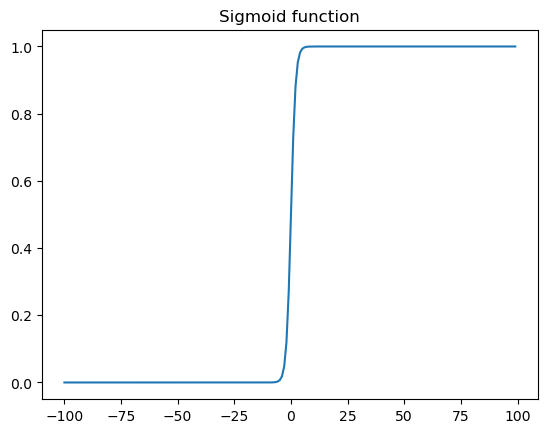

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(input_value):
    sigmoid = 1 / (1 + np.exp(-input_value))
    return sigmoid

input_values = np.array([n for n in range(-100,100)])
sigmoid_values = sigmoid(input_values)
plt.plot(input_values, sigmoid_values)
plt.title("Sigmoid function")

A more modern example is the rectified linear unit (ReLU), which sends all negative values to zero and leaves positive values untouched:

$$
\mathrm{ReLU(x)} = \begin{cases}
                            x \text{  if  } x \geq 0 \\ 
                            0 \text{  otherwise}
                    \end{cases}
$$


Text(0.5, 1.0, 'Rectified Linear Unit (ReLU)')

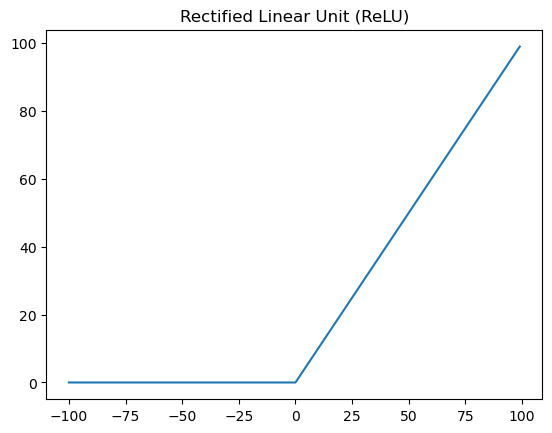

In [40]:
def relu(input_value):
    return np.maximum(0,input_value)

input_values = np.array([n for n in range(-100,100)])
relu_values = relu(input_values)
plt.plot(input_values, relu_values)
plt.title("Rectified Linear Unit (ReLU)")

In [25]:
relu(4)

4